In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
def msr(x,y):
    #zwraca próbkowe beta_1 i beta_0
    n = len(x)
    a = (n * np.sum(x*y) - np.sum(x) * np.sum(y) ) / (n * np.sum(x**2) - np.sum(x)**2)
    b = (np.sum(x**2) * np.sum(y) - np.sum(x) * np.sum(x*y)) / (n*np.sum(x**2) - np.sum(x)**2)
    return [a,b]

# Zadanie 1

In [4]:
def get_bounds(n,sigma,x,b_0,b_1):
    wpadło_b_0 = 0
    wpadło_b_1 = 0
    m = 1000
    dlugosc_przedzialu_b_0 = np.zeros(m) 
    dlugosc_przedzialu_b_1 = np.zeros(m) 
    for i in range(m):
        alpha = 0.05
        epsilons = np.random.normal(0,sigma,n)
        y = b_0 + b_1*x + epsilons
        b_1_hat, b_0_hat = msr(x,y)
        bound_b0 = sps.norm.ppf(1-alpha/2,0,1)*sigma*np.sqrt(((1/n) + np.mean(x)**2/np.sum((x-np.mean(x))**2)))
        bound_b1 = sps.norm.ppf(1-alpha/2,0,1)*sigma*(1/np.sqrt(np.sum((x-np.mean(x))**2)))

        dlugosc_przedzialu_b_0[i] = 2*bound_b0
        dlugosc_przedzialu_b_1[i] = 2*bound_b1
        
        if b_0_hat-bound_b0 < b_0 < b_0_hat+bound_b0 :
            wpadło_b_0 += 1
        if b_1_hat-bound_b1 < b_1 < b_1_hat+bound_b1 :    
            wpadło_b_1 += 1
    return wpadło_b_0/m, wpadło_b_1/m, np.mean(dlugosc_przedzialu_b_0), np.mean(dlugosc_przedzialu_b_1)


In [5]:
b_0 = 2
b_1 = 5
sigmas = [0.01, 0.5, 0.9, 1]
n = np.arange(5,100,10)
m = 1000

sigma1_b_0_znane = np.zeros((4,len(n)))
sigma1_b_1_znane = np.zeros((4,len(n)))

dlugosc_b0_znane = np.zeros(len(n))
dlugosc_b1_znane = np.zeros(len(n))

for k in range(4):
    for i in range(len(n)):
        x = np.arange(1,n[i]+1,1)
        sigma1_b_0_znane[k,i] = get_bounds(n[i],sigmas[k],x,b_0,b_1)[0]

for k in range(4):
    for i in range(len(n)):
        x = np.arange(1,n[i]+1,1)
        sigma1_b_1_znane[k,i] = get_bounds(n[i],sigmas[k],x,b_0,b_1)[1]

for i in range(len(n)):
    x = np.arange(1,n[i]+1,1)
    dlugosc_b0_znane[i] = get_bounds(n[i],sigmas[3],x,b_0,b_1)[2]
    dlugosc_b1_znane[i] = get_bounds(n[i],sigmas[3],x,b_0,b_1)[3]

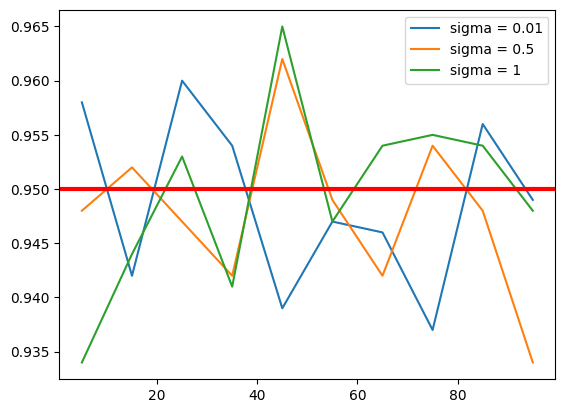

In [6]:
plt.plot(n,sigma1_b_0_znane[0], label = "sigma = 0.01")
plt.plot(n,sigma1_b_0_znane[1], label = "sigma = 0.5")
plt.plot(n,sigma1_b_0_znane[3], label = "sigma = 1")
plt.axhline(0.95, color = "red", lw= 3)
plt.legend()

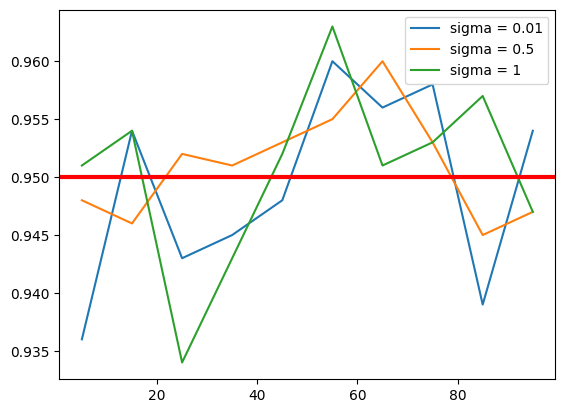

In [7]:
plt.plot(n,sigma1_b_1_znane[0], label = "sigma = 0.01")
plt.plot(n,sigma1_b_1_znane[1], label = "sigma = 0.5")
plt.plot(n,sigma1_b_1_znane[3], label = "sigma = 1")
plt.axhline(0.95, color = "red", lw= 3)
plt.legend()

# Zadanie 2

In [8]:
def get_bounds_unknown(n,sigma,x,b_0,b_1):
    wpadło_b_0 = 0
    wpadło_b_1 = 0
    m = 1000
    dlugosc_przedzialu_b_0 = np.zeros(m) 
    dlugosc_przedzialu_b_1 = np.zeros(m) 
    for i in range(m):
        alpha = 0.05
        epsilons = np.random.normal(0,sigma,n)
        y = b_0 + b_1*x + epsilons
        b_1_hat, b_0_hat = msr(x,y)

        y_hat = b_0_hat + b_1_hat * x
        s_2 = (1/(n-2))*np.sum(np.power(y_hat - y, 2))

        SE_b_hat_0 = np.sqrt(s_2*((1/n ) + np.power(np.mean(x),2)/np.sum(np.power(x-np.mean(x),2))))
        SE_b_hat_1 = np.sqrt(s_2*(1/np.sum(np.power(x-np.mean(x),2))))

        bound_b0 = sps.t.ppf(1-alpha/2,n-2)*SE_b_hat_0
        bound_b1 = sps.t.ppf(1-alpha/2,n-2)*SE_b_hat_1

        dlugosc_przedzialu_b_0[i] = 2*bound_b0
        dlugosc_przedzialu_b_1[i] = 2*bound_b1

        if b_0_hat-bound_b0 < b_0 < b_0_hat+bound_b0 :
            wpadło_b_0 += 1
        if b_1_hat-bound_b1 < b_1 < b_1_hat+bound_b1 :    
            wpadło_b_1 += 1
        
    return wpadło_b_0/m, wpadło_b_1/m, np.mean(dlugosc_przedzialu_b_0), np.mean(dlugosc_przedzialu_b_1)

In [9]:
b_0 = 2
b_1 = 5
sigma = 0.9
n = np.arange(5,100,10)
m = 1000

sigma1_b_0_nieznane = np.zeros(len(n))
sigma1_b_1_nieznane = np.zeros(len(n))

dlugosc_b0_nieznane = np.zeros(len(n))
dlugosc_b1_nieznane = np.zeros(len(n))

for i in range(len(n)):
    x = np.arange(1,n[i]+1,1)
    sigma1_b_0_nieznane[i] = get_bounds_unknown(n[i],sigma,x,b_0,b_1)[0]
    sigma1_b_1_nieznane[i] = get_bounds_unknown(n[i],sigma,x,b_0,b_1)[1]
    dlugosc_b0_nieznane[i] = get_bounds_unknown(n[i],sigma,x,b_0,b_1)[2]
    dlugosc_b1_nieznane[i] = get_bounds_unknown(n[i],sigma,x,b_0,b_1)[3]

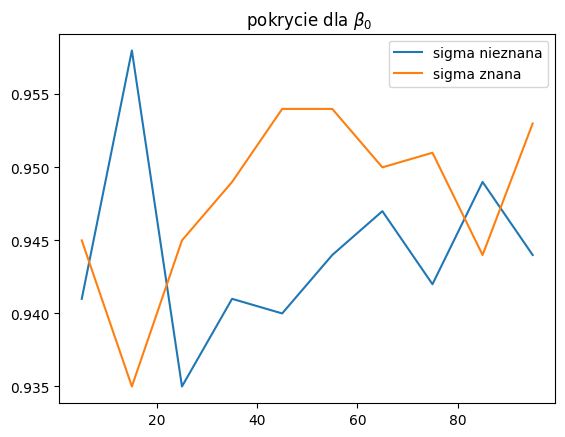

In [10]:
plt.plot(n,sigma1_b_0_nieznane, label = "sigma nieznana")
plt.plot(n,sigma1_b_0_znane[2], label = "sigma znana")
plt.title(r' pokrycie dla $\beta_0$')

plt.legend()

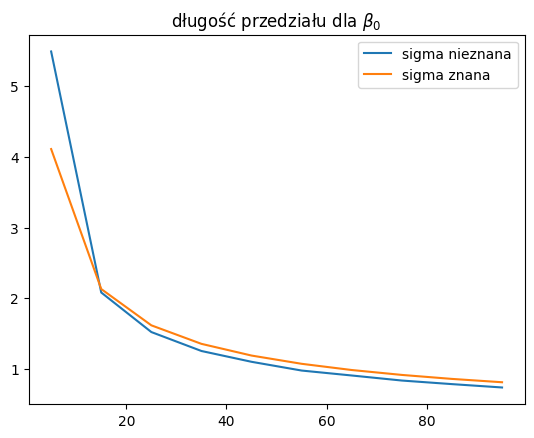

In [11]:
plt.plot(n,dlugosc_b0_nieznane, label = "sigma nieznana")
plt.plot(n,dlugosc_b0_znane, label = "sigma znana")
plt.title(r'długość przedziału dla $\beta_0$')

plt.legend()

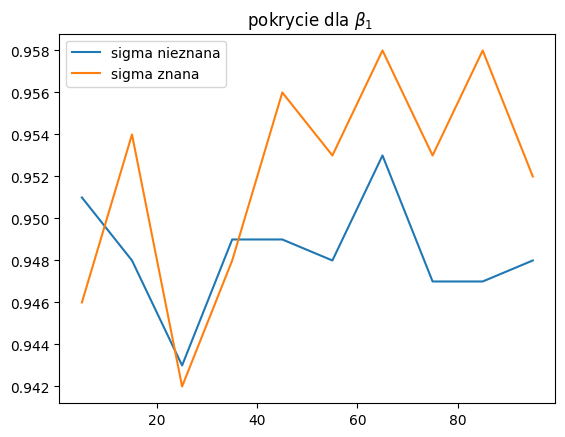

In [12]:
plt.plot(n,sigma1_b_1_nieznane, label = "sigma nieznana")
plt.plot(n,sigma1_b_1_znane[2], label = "sigma znana")
plt.title(r' pokrycie dla $\beta_1$')

plt.legend()

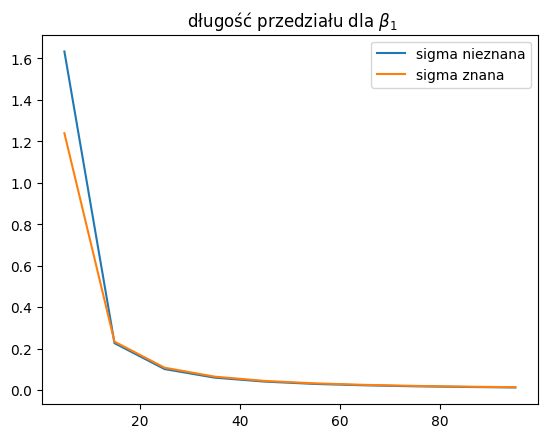

In [13]:
plt.plot(n,dlugosc_b1_nieznane, label = "sigma nieznana")
plt.plot(n,dlugosc_b1_znane, label = "sigma znana")
plt.title(r' długość przedziału dla $\beta_1$')

plt.legend()

# Zadanie 3

In [14]:
data4 = np.loadtxt("zad4_lista1.txt")

In [15]:
sorted_indices = np.argsort(data4[:,0])
data_sorted = data4[sorted_indices]


In [83]:
train_data = data_sorted[:990]
test_data = data_sorted[990:]
x_train = train_data[:,0]
y_train = train_data[:,1]

x_test = test_data[:,0]
y_test = test_data[:,1]
alpha = 0.05

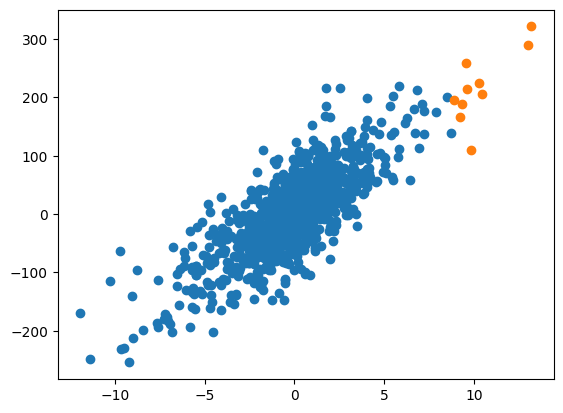

In [84]:
plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(test_data[:,0],test_data[:,1])


In [106]:
n = len(x_train)
beta_1_hat, beta_0_hat = msr(x_train,y_train)
y_hat_1 = beta_0_hat + beta_1_hat*x_train
regres = beta_0_hat + beta_1_hat*data_sorted[:,0]

s_2 = np.sum((y_train - y_hat_1) ** 2) / (n - 2)
SE = np.sqrt(s_2*(1 + (1/n) + np.power(x_test-np.mean(x_train),2)/np.sum(np.power(x_test-np.mean(x_train),2))))
y_hat_2 = beta_0_hat + beta_1_hat*x_test

upper_bound = y_hat_2 + sps.t.ppf(1-alpha/2,n-2)*SE
lower_bound = y_hat_2 - sps.t.ppf(1-alpha/2,n-2)*SE

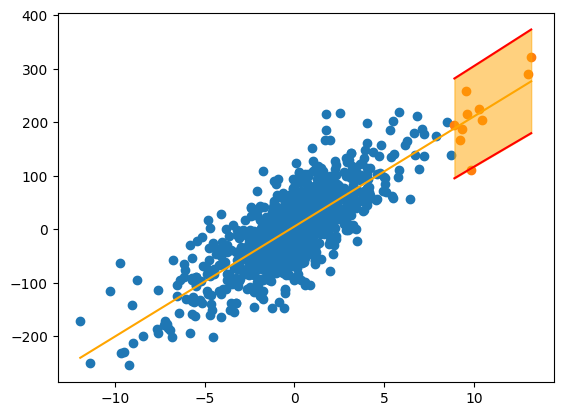

In [110]:
plt.scatter(train_data[:,0],train_data[:,1])
plt.scatter(test_data[:,0],test_data[:,1])
plt.plot(x_test,upper_bound, color = "red")
plt.plot(x_test,lower_bound, color = "red")
plt.fill_between(x_test,upper_bound,lower_bound,color="orange", alpha=0.5)
plt.plot(data_sorted[:,0],regres, color = "orange")